# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [3]:
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"
city_response = requests.get(f"{url}&q={cities[0]}").json()
city_response['dt']

1686498242

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | cable beach
City not found. Skipping...
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | karatau
Processing Record 10 of Set 1 | kudahuvadhoo
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | daur
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | tromso
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | missoula
Processing Record 22 of Set 1 | lebu
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,296.22,53,0,2.57,US,1686498242
1,iqaluit,63.7506,-68.5145,274.00,86,100,7.20,CA,1686498495
2,college,64.8569,-147.8028,287.36,53,40,4.63,US,1686498496
3,albany,42.6001,-73.9662,299.23,57,100,0.45,US,1686498380
4,chonchi,-42.6128,-73.8092,282.66,82,98,1.79,CL,1686498496


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,296.22,53,0,2.57,US,1686498242
1,iqaluit,63.7506,-68.5145,274.00,86,100,7.20,CA,1686498495
2,college,64.8569,-147.8028,287.36,53,40,4.63,US,1686498496
3,albany,42.6001,-73.9662,299.23,57,100,0.45,US,1686498380
4,chonchi,-42.6128,-73.8092,282.66,82,98,1.79,CL,1686498496


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

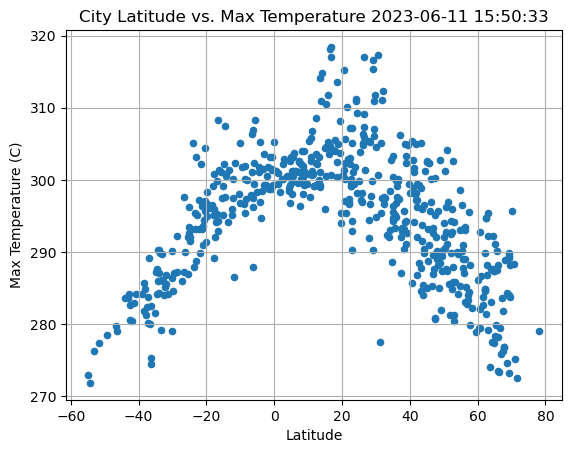

In [24]:
# Build scatter plot for latitude vs. temperature
date_time = pd.to_datetime(city_date, unit='s')
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', xlabel='Latitude', ylabel='Max Temperature (C)',
                  title=f'City Latitude vs. Max Temperature {date_time}', grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

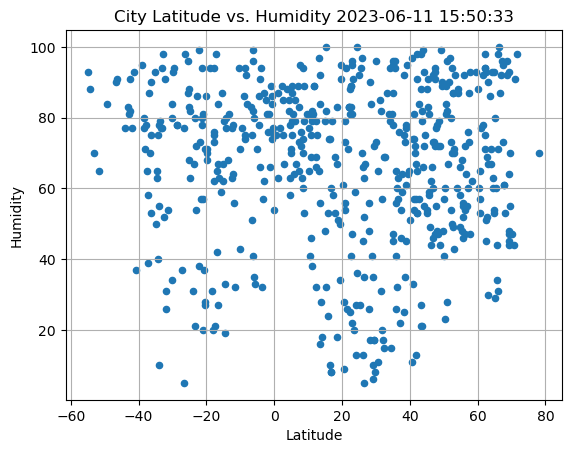

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', xlabel='Latitude', ylabel='Humidity',
                  title=f'City Latitude vs. Humidity {date_time}', grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

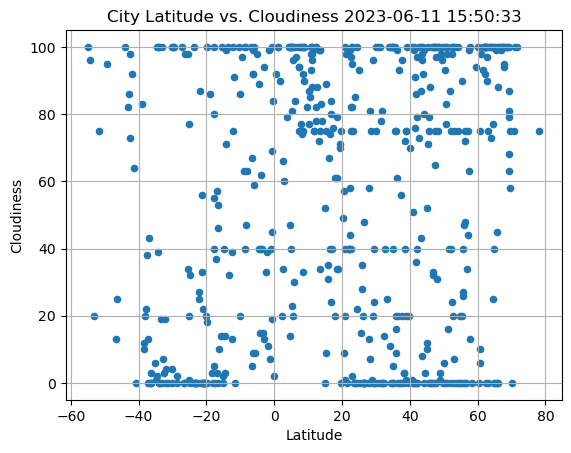

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', xlabel='Latitude', ylabel='Cloudiness',
                  title=f'City Latitude vs. Cloudiness {date_time}', grid=True)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

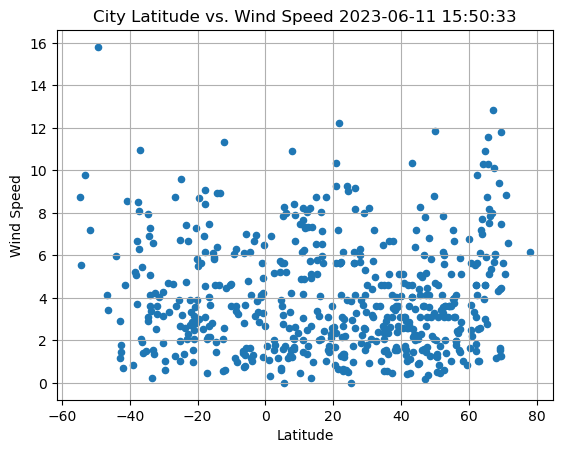

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', xlabel='Latitude', ylabel='Wind Speed',
                  title=f'City Latitude vs. Wind Speed {date_time}', grid=True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
df = pd.DataFrame()
x_s = 0
y_s = 0

def line_regress():
    # Assume coln is a legitimate column name in the corresponding df.
    coln= input("y- axis Column Name: ")
    
    x_values = df['Lat']
    y_values = df[coln]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    slope_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(slope_eq, (x_s,y_s), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(coln)
    print(f"The r-squared is: {rvalue**2}")

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,296.22,53,0,2.57,US,1686498242
1,iqaluit,63.7506,-68.5145,274.00,86,100,7.20,CA,1686498495
2,college,64.8569,-147.8028,287.36,53,40,4.63,US,1686498496
3,albany,42.6001,-73.9662,299.23,57,100,0.45,US,1686498380
7,karatau,43.1667,70.4667,298.82,27,87,10.35,KZ,1686498497


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,chonchi,-42.6128,-73.8092,282.66,82,98,1.79,CL,1686498496
5,port-aux-francais,-49.3500,70.2167,278.47,84,95,15.81,TF,1686498497
6,puerto natales,-51.7236,-72.4875,277.40,65,75,7.20,CL,1686498497
9,waitangi,-43.9535,-176.5597,283.61,77,100,5.95,NZ,1686498498
14,adamstown,-25.0660,-130.1015,293.45,68,77,6.73,PN,1686498500


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5241312686526973


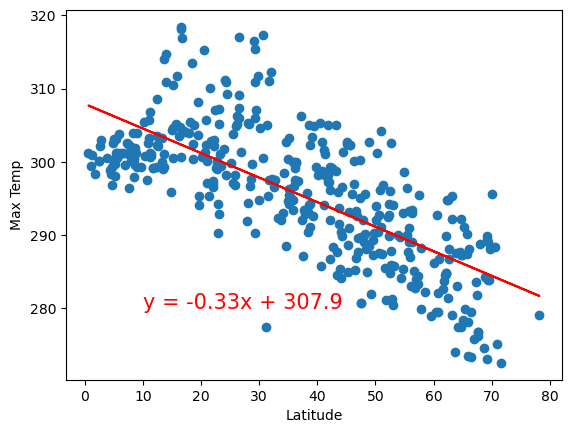

In [16]:
# Max Temp: Northern Hemisphere
df = northern_hemi_df
x_s = 10
y_s = 280

line_regress()

The r-squared is: 0.7377332536020526


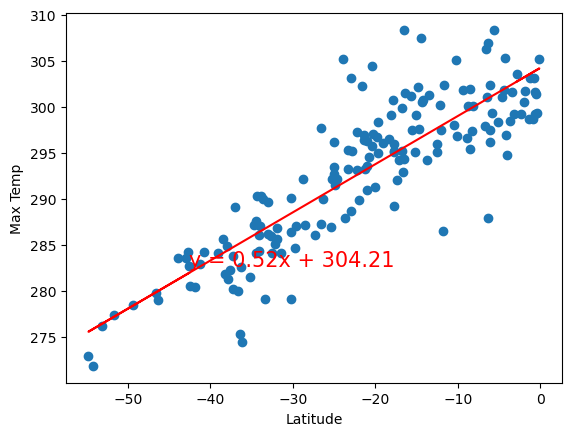

In [17]:
# Max Temp: Southern Hemisphere
df = southern_hemi_df
x_s = df.iloc[0,1]
y_s = df.iloc[0, 3]

line_regress()

**Discussion about the linear relationship:** The cities that are closest to the equator (latitude == 0) have the greatest maximum temperature while the cities farthest from the equator have the lowest maximum temperature.  This is represented by the downward slope in the northern hemisphere chart (as latitude becomes greater than 0) and the upward slope in the southern hemisphere chart (as latitude approaches 0).  Both northern and southern charts's r2 are 0.58 and 0.67 respectively further displaying the relationship between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0012005435679818097


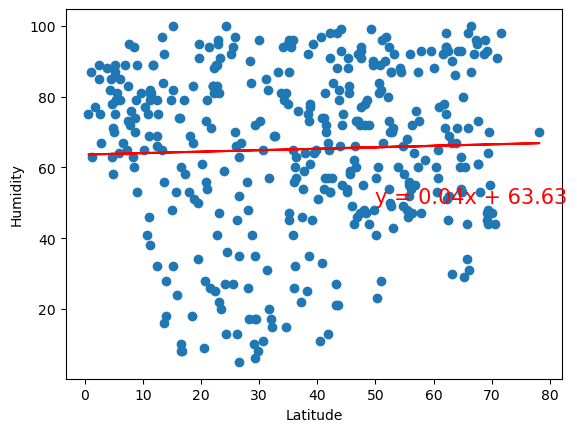

In [18]:
# Humidity: Northern Hemisphere
df = northern_hemi_df
x_s = 50
y_s = 50

line_regress()

The r-squared is: 0.001449137558482084


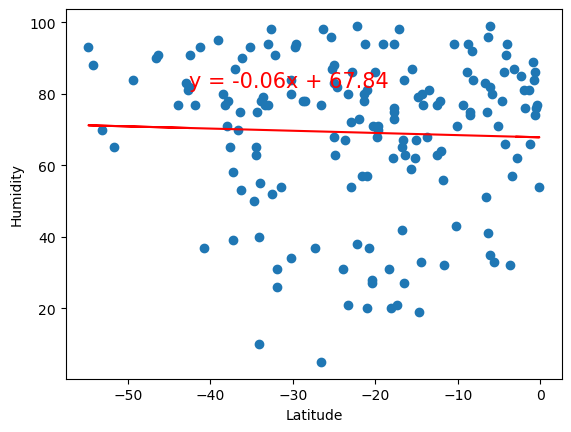

In [19]:
# Humidity: Southern Hemisphere
df = southern_hemi_df
x_s = df.iloc[0,1]
y_s = df.iloc[0, 4]

line_regress()

**Discussion about the linear relationship:** The r2 for both hemispheres are very low which is proven all the more by the slope of the line nearly equalling 0.  The poor values for both r2 and slope shows that the goodness fit for the model is quite bad and that there's very little in the relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0008053693657701615


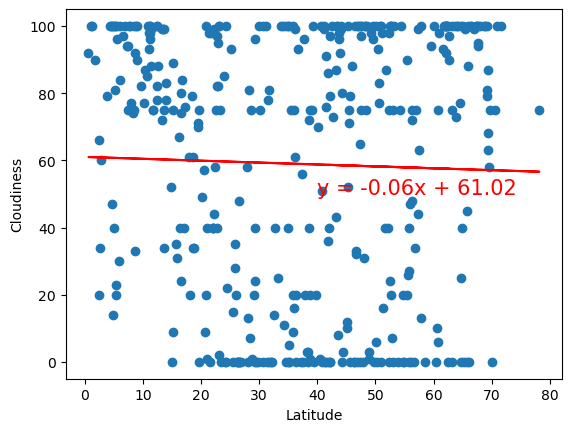

In [20]:
# Cloudiness: Northern Hemisphere
df = northern_hemi_df
x_s = 40
y_s = 50

line_regress()

The r-squared is: 0.007267324507894156


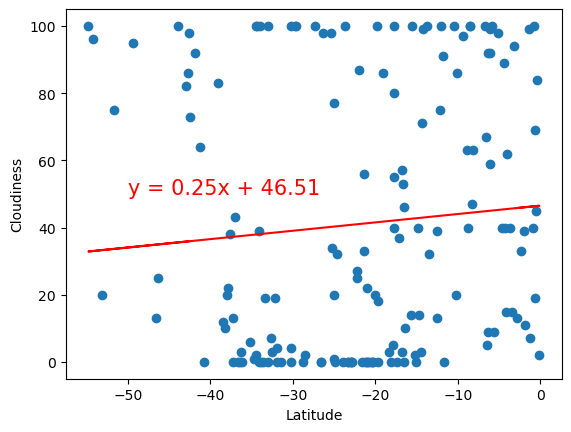

In [21]:
# Cloudiness: Southern Hemisphere
df = southern_hemi_df
x_s = -50
y_s = 50

line_regress()

**Discussion about the linear relationship:** The r2 for both hemispheres are very low which is proven all the more by the slope of the line nearly equalling 0 (more so for the northern hemisphere).  The poor values for both r2 and slope shows that the goodness fit for the model is quite bad and that there's very little in the relationship between latitude and cloudiness in either hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008773860384246556


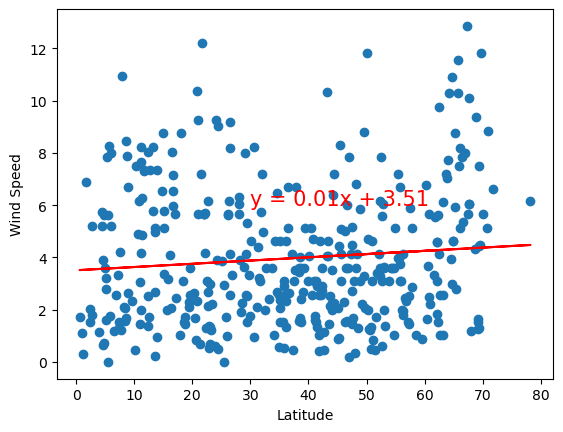

In [22]:
# Wind Speed: Northern Hemisphere
df = northern_hemi_df
x_s = 30
y_s = 6

line_regress()

The r-squared is: 0.032334266613213945


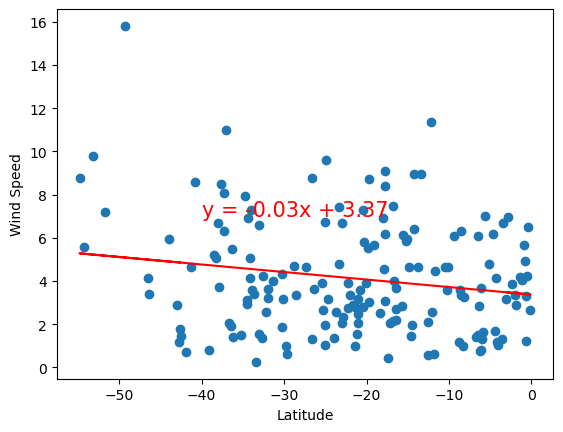

In [23]:
# Wind Speed: Southern Hemisphere
df = southern_hemi_df
x_s = -40
y_s = 7

line_regress()

**Discussion about the linear relationship:** The r2 for both hemispheres are low with the northern hemisphere nearly equalling 0.  Although the south has a somewhat mediocre slope, both hemispheres still have poor values for r2 and slope, displating that the goodness fit for the model is quite bad and that there's very little in the relationship between latitude and wind speed.